## FITS file (Flexible Image Transport System) - Standard Astro Data Format

FITS (Flexible Image Transport System) is the data format most widely used within astronomy for transporting, analyzing, and archiving scientific data files. FITS is much more than just another image format (such as JPG or GIF) and is primarily designed to store scientific data sets consisting of multidimensional arrays (images) and 2-dimensional tables organized into rows and columns of information.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as fits

In [2]:
plt.style.use('ggplot')
plt.rc('axes', grid=False)   # turn off the background grid for images

## FITS files consist of at least two parts - `Header` and `Data`

* A FITS file is comprised of segments called Header/Data Units (HDUs), where the first HDU is called the `Primary HDU`.
* The primary data array can contain a 1-D spectrum, a 2-D image, or a 3-D data cube.
* Every HDU consists of an ASCII formatted `Header Unit`. 
* Each header unit contains a sequence of fixed-length 80-character keyword (`Cards`)

In [3]:
data_file = ".fits"

my_fits_file = fits.open(data_file)

my_fits_file.info()

Filename: ./MyData/bsg01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (665, 1000)   float32   


In [4]:
image_data = my_fits_file[0].data
image_header = my_fits_file[0].header

In [5]:
image_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  665                                                  
NAXIS2  =                 1000                                                  
EXTEND  =                    T                                                  

In [6]:
print("The image has a shape [height,width] of {0}".format(image_data.shape))
print("The image is made up of data of type {0}".format(image_data.dtype))

The image has a shape [height,width] of (1000, 665)
The image is made up of data of type >f4


## FITS format preserves the full dynamic range of data

In [7]:
print("The image has a maximum value of {0}".format(image_data.max()))
print("The image has a minimum value of {0}".format(image_data.min()))

The image has a maximum value of 101.0
The image has a minimum value of 0.03921568766236305


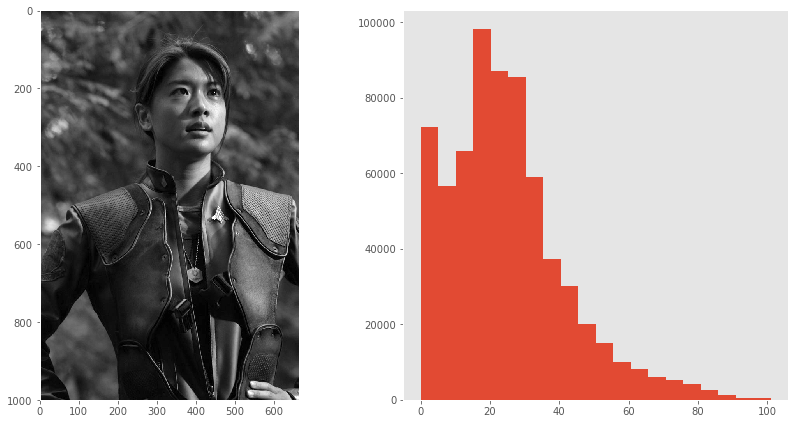

In [8]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(image_data,cmap=plt.cm.gray)

ax[1].hist(image_data.flatten(),bins=20);

## You can use masks on images

In [9]:
copy_data = np.copy(image_data)        # make a copy of the data to work with

cut_off = 40

mask = np.where(copy_data > cut_off)
copy_data[mask] = 60                   # You can not just throw data away, you have to set it to something.

In [10]:
print("The cropped image has a maximum value of {0}".format(copy_data.max()))
print("The cropped image has a minimum value of {0}".format(copy_data.min()))

The cropped image has a maximum value of 60.0
The cropped image has a minimum value of 0.03921568766236305


#### You can use specific bins for histograms

In [11]:
my_bins = np.arange(0,110,5)

my_bins

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105])

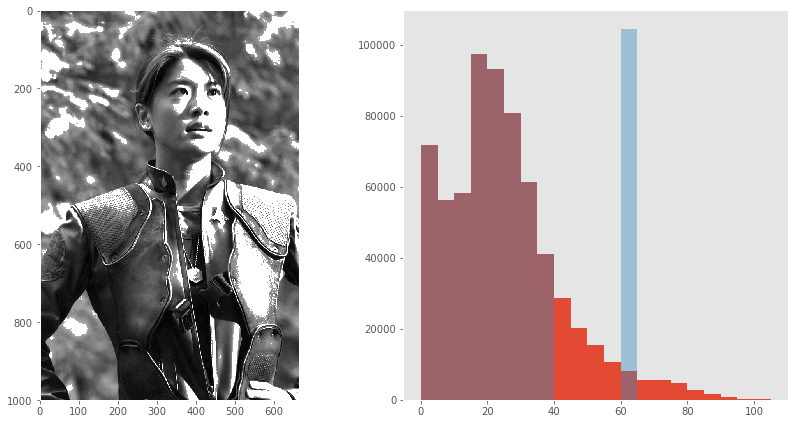

In [12]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(copy_data,cmap=plt.cm.gray)

ax[1].hist(image_data.flatten(),bins=my_bins)
ax[1].hist(copy_data.flatten(),bins=my_bins, alpha = 0.40);

## You can add and subtract images

In [4]:
another_image_file = "Noise.fits"
image_file = "Secret.fits"
another_image_data = fits.getdata(another_image_file)     # a quick way to just get the data

NameError: name 'image_data' is not defined

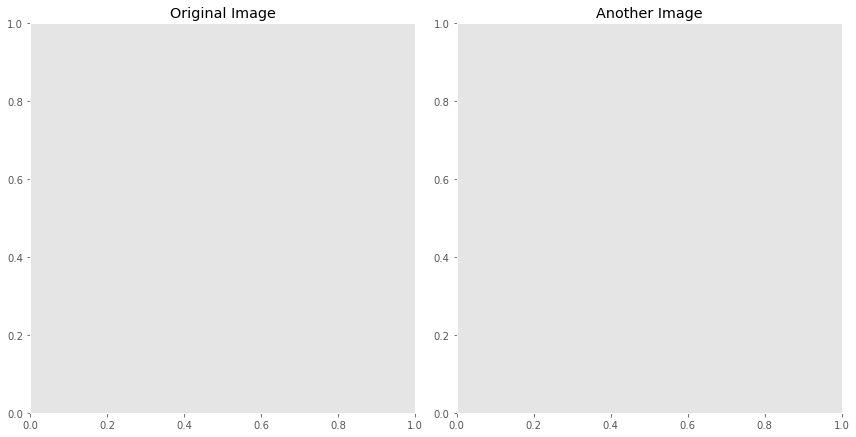

In [5]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].set_title("Original Image")
ax[1].set_title("Another Image")

ax[0].imshow(image_data, cmap=plt.cm.gray)
ax[1].imshow(another_image_data, cmap=plt.cm.gray);

## The two images above may look the same but they are not!

### Subtracting the two images reveals the truth.

In [7]:
real_image = image_file - another_image_data                 # Subtract the images pixel by pixel

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U11') dtype('<U11') dtype('<U11')

NameError: name 'image_data' is not defined

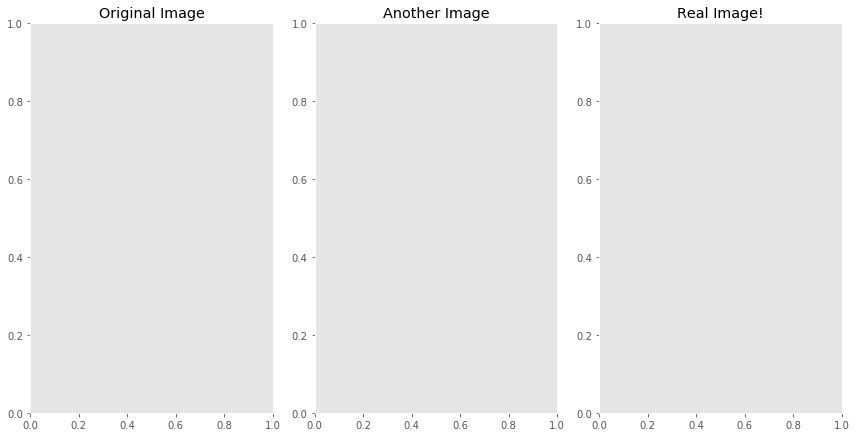

In [8]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].set_title("Original Image")
ax[1].set_title("Another Image")
ax[2].set_title("Real Image!")

ax[0].imshow(image_file, cmap=plt.cm.gray)
ax[1].imshow(another_image_data, cmap=plt.cm.gray);
ax[2].imshow(real_image, cmap=plt.cm.gray);

In [17]:
print("The real image has a maximum value of {0}".format(real_image.max()))
print("The real image has a minimum value of {0}".format(real_image.min()))

The real image has a maximum value of 1.0000038146972656
The real image has a minimum value of 0.023529052734375


---
## FITS Tables - An astronomical example

* Stellar spectra data from the [ESO Library of Stellar Spectra](http://www.eso.org/sci/facilities/paranal/decommissioned/isaac/tools/lib.html)

In [18]:
my_spectra_file = './MyData/Star_G5.fits'

my_spectra_fits = fits.open(my_spectra_file)

my_spectra_fits.info()

Filename: ./MyData/Star_G5.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (4771,)   float32   


In [19]:
spectra_data = my_spectra_fits[0].data
spectra_header = my_spectra_fits[0].header

In [20]:
spectra_header[0:15]

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 4771 / Axis length                                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
EXTEND  =                    F / File may contain extensions                    
DATE    = '2000-02-16T18:16:26' / Date FITS file was generated                  
IRAF-TLM= '15:16:26 (16/02/2000)' / Time of last modification                   
APNUM1  = '1 1     '                                                            
WCSDIM  =                    1                                                  
CTYPE1  = 'LINEAR  '                                                            
CRVAL1  =                1150.                                                  
CRPIX1  =                   

In [21]:
# The FITS header has the information to make an array of wavelengths

start_wavelength = spectra_header['CRVAL1']
num_of_points = spectra_header['NAXIS1']
width_of_points  = spectra_header['CDELT1']

end_wavelength = start_wavelength + (num_of_points * width_of_points)

wavelength_range = np.arange(start_wavelength,end_wavelength,width_of_points)

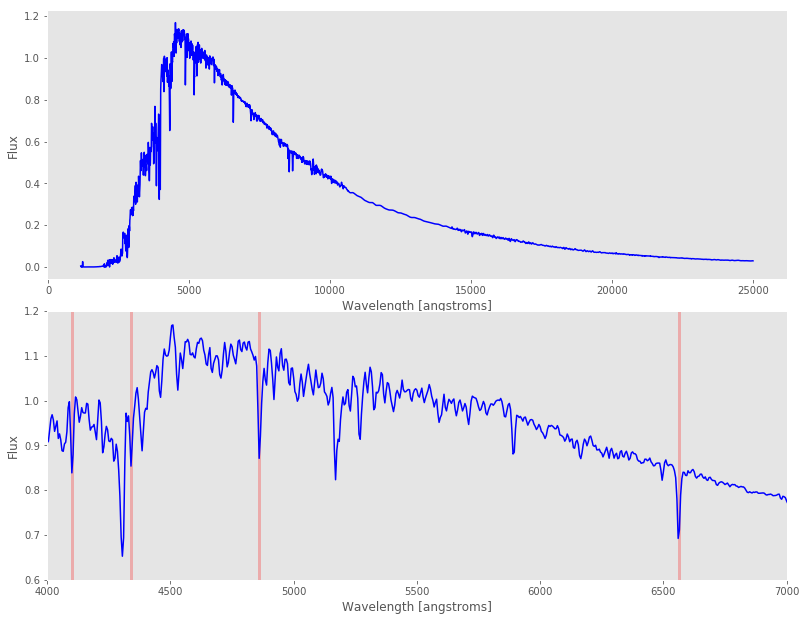

In [22]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

# Full spectra

ax[0].plot(wavelength_range, spectra_data, color='b')
ax[0].set_ylabel("Flux")
ax[0].set_xlabel("Wavelength [angstroms]")

# Just the visible range with the hydrogen Balmer lines

ax[1].set_xlim(4000,7000)
ax[1].set_ylim(0.6,1.2)
ax[1].plot(wavelength_range, spectra_data, color='b')
ax[1].set_ylabel("Flux")
ax[1].set_xlabel("Wavelength [angstroms]")

H_Balmer = [6563,4861,4341,4102,3970,3889,3835,3646]

ax[1].vlines(H_Balmer,0,2, color='r', linewidth=3, alpha = 0.25);

## Stellar spectral classes

In [23]:
import glob

star_list = glob.glob('./MyData/Star_*5.fits')

star_list

['./MyData\\Star_A5.fits',
 './MyData\\Star_G5.fits',
 './MyData\\Star_K5.fits',
 './MyData\\Star_M5.fits',
 './MyData\\Star_O5.fits']

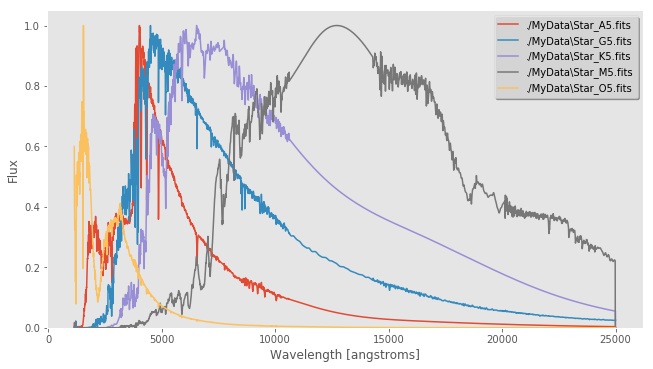

In [24]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(9,5)

fig.tight_layout()

# Full spectra

ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength [angstroms]")
ax.set_ylim(0.0, 1.05)

for file in star_list:
        
    spectra = fits.getdata(file)
    
    spectra_normalized = spectra / spectra.max()
    
    ax.plot(wavelength_range, spectra_normalized, label=file)

ax.legend(loc=0,shadow=True);   

---
## FITS Images - An astronomical example

In [25]:
star_file = "./MyData/star_field.fits"

star_fits_file = fits.open(star_file)

star_fits_file.info()

Filename: ./MyData/star_field.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     125   (706, 706)   int16   
  1  Photometric CALTABLE    1 BinTableHDU     39   16R x 4C   [1D, 1D, 1D, 1J]   


In [26]:
star_data = star_fits_file[0].data
star_header = star_fits_file[0].header

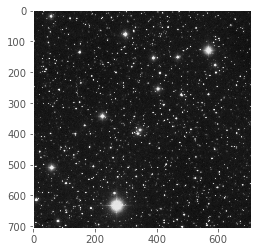

In [27]:
plt.imshow(star_data, cmap=plt.cm.gray)

### Notice the origin is in the upper left corner (the image is upside down)

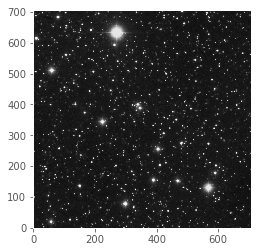

In [28]:
plt.imshow(star_data, origin='lower', cmap=plt.cm.gray)

### Better, the origin is in the lower left corner

## World Coordinate System `wcs`

In [29]:
from astropy.wcs import WCS

In [30]:
my_wcs = WCS(star_header)

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


In [31]:
my_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 36.379559874999998  48.659734608333331  
CRPIX : -1897.5057144913144  -2506.0479613718899  
PC1_1 PC1_2  : 0.025281183438831296  -0.00029577718491173208  
PC2_1 PC2_2  : 0.00029670462184841262  0.025284245687758399  
CDELT : -0.01867984095931513  0.01867984095931513  
NAXIS : 706  706

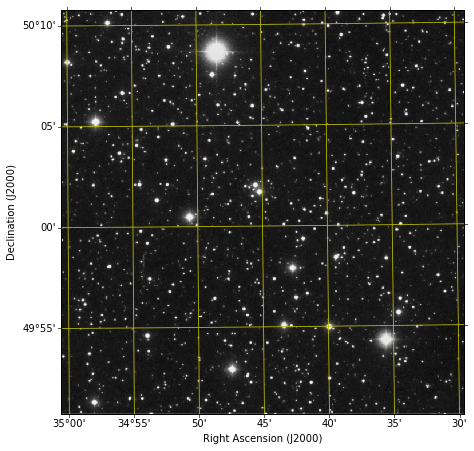

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=my_wcs)

fig.set_size_inches(6,6)

fig.tight_layout()

ax.grid(color='y', ls='-')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

ax.imshow(star_data, origin='lower', cmap=plt.cm.gray);

# RGB - Pseudocolor Images

In [33]:
from astropy.visualization import make_lupton_rgb

In [34]:
red_img = fits.getdata("./MyData/m51_IR.fits").astype(float)
green_img = fits.getdata("./MyData/m51_red.fits").astype(float)
blue_img= fits.getdata("./MyData/m51_blue.fits").astype(float)

In [35]:
clean_r =  red_img - np.median(red_img)
clean_g =  green_img - np.median(green_img)
clean_b =  blue_img - np.median(blue_img)

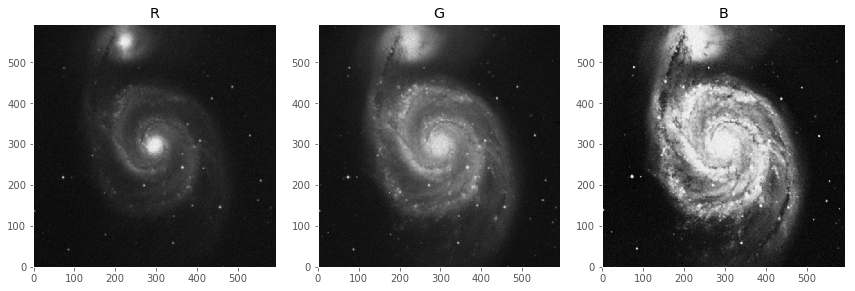

In [36]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].set_title("R")
ax[1].set_title("G")
ax[2].set_title("B")

ax[0].imshow(clean_r, origin='lower', cmap=plt.cm.gray)
ax[1].imshow(clean_g, origin='lower', cmap=plt.cm.gray);
ax[2].imshow(clean_b, origin='lower', cmap=plt.cm.gray);

In [37]:
image = make_lupton_rgb(clean_r, clean_g, clean_b, stretch = 5000)

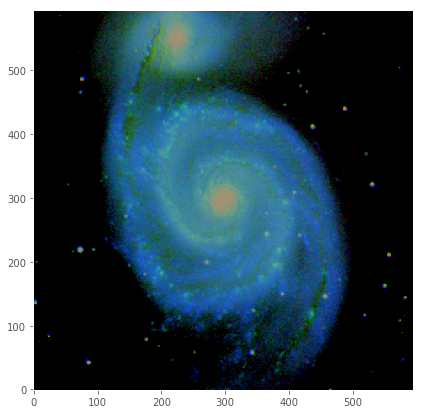

In [38]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)

fig.tight_layout()

ax.imshow(image, origin='lower', cmap=plt.cm.gray);

---
## Sigma Clipping

In [39]:
from astropy import stats

In [40]:
my_data = np.array([1, 5, 6, 8, 100, 5, 3, 2, 4, 5])

my_data.mean(), my_data.std()

(13.9, 28.762649391180911)

In [41]:
filtered_data = stats.sigma_clip(my_data, sigma=2, iters=5) 

filtered_data

masked_array(data = [1 5 6 8 -- 5 3 2 4 5],
             mask = [False False False False  True False False False False False],
       fill_value = 999999)

#### Rejected Data

In [42]:
my_data[filtered_data.mask]

array([100])

#### Accepted Data

In [43]:
my_data[~filtered_data.mask]

array([1, 5, 6, 8, 5, 3, 2, 4, 5])

## Sigma clipping an image

In [44]:
star_data.mean(), star_data.std(), star_data.max(), star_data.min()

(3936.4461054177468, 1263.1281641991902, 14220, 2472)

In [45]:
clip_star = stats.sigma_clip(star_data, sigma=8, iters=5) 

In [46]:
copy_data = np.copy(star_data)        # make a copy of the data to work with

copy_data[~clip_star.mask] = star_data.min()

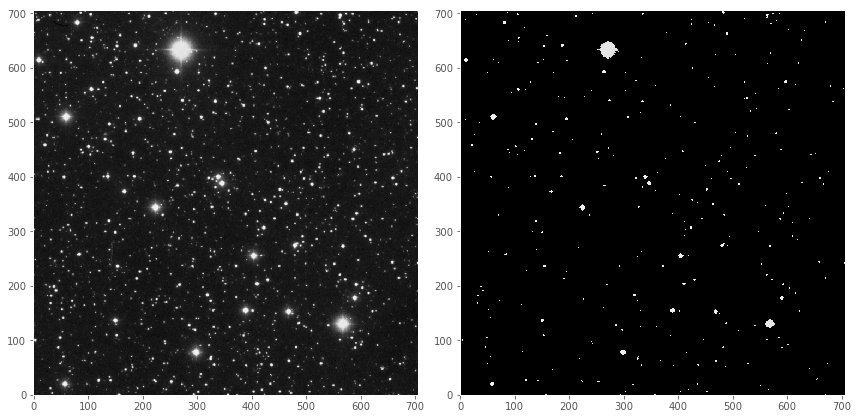

In [47]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(star_data, origin='lower', cmap=plt.cm.gray)
ax[1].imshow(copy_data, origin='lower', cmap=plt.cm.gray);